Mean Squared Error: 1920412.7438248475
R-squared: -3.4672041848704538e-06
Coefficients: [ 0.00000000e+000  1.03760153e-108  8.12141388e-115  1.13497363e-186
  3.93625553e-141  1.53759982e-143  1.71174194e-146 -6.20533949e-152
 -8.20414313e-154  1.05278737e-153  3.44918047e-148  1.12499987e-142
  3.63035877e-137  1.15525234e-131  3.60771138e-126  1.09735234e-120
  3.21022368e-115  8.82079275e-110  2.15846856e-104  3.96888093e-099
 -9.86225024e-105]
Intercept: 351.95179263617666


/home/kaan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


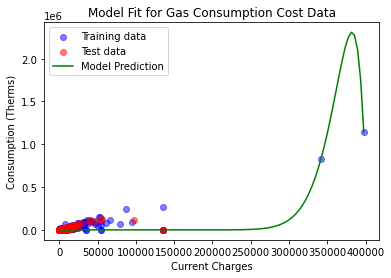

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Load the data
df = pd.read_csv('GasConsumption.csv', low_memory=False)  # Replace 'TaxiData.csv' with the actual path to your CSV file

# Convert 'trip_distance' and 'fare_amount' to numeric, coercing errors to NaN
df['Current Charges'] = pd.to_numeric(df['Current Charges'], errors='coerce')
df['Consumption (Therms)'] = pd.to_numeric(df['Consumption (Therms)'], errors='coerce')

# Drop rows with NaN values that resulted from coercion
df = df.dropna(subset=['Current Charges', 'Consumption (Therms)'])

# Remove rows with negative 'trip_distance' or 'fare_amount'
df = df[(df['Current Charges'] >= 0) & (df['Consumption (Therms)'] >= 0)]

# After cleaning, we proceed with the rest of the processing
X = df[['Current Charges']]  # Features
y = df['Consumption (Therms)']      # Target variable

# Create a pipeline with Polynomial Features and Linear Regression
model = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2)),  # Add polynomial features
    ('regressor', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with the original target
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate the MSE and print R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)
print(f'Mean Squared Error: {mse}')
print(f"R-squared: {r_squared}")

# Get the model's coefficients and intercept
regressor = model.named_steps['regressor']
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Generate predictions for plotting
X_min, X_max = X['Current Charges'].min(), X['Current Charges'].max()
X_plot = np.linspace(X_min, X_max, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Plot the results
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Test data')
plt.plot(X_plot, y_plot, color='green', label='Model Prediction')
plt.xlabel('Current Charges')
plt.ylabel('Consumption (Therms)')
plt.title('Model Fit for Gas Consumption Cost Data')
plt.legend()
plt.show()
